<a href="https://colab.research.google.com/github/sls3542/Project2/blob/main/Project2Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = "/content/drive/MyDrive/Intermediate Machine Learning/salaries.csv"
df = pd.read_csv(path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [3]:
df.shape

(1195, 11)

Upon review of this dataset, all columns are relevant to the predictions. 

In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values in the data

In [5]:
df['work_year'].value_counts()

2022    893
2021    227
2020     75
Name: work_year, dtype: int64

No erroneous data here.

In [6]:
df['experience_level'].value_counts()

SE    702
MI    314
EN    138
EX     41
Name: experience_level, dtype: int64

looks good!

In [7]:
df['employment_type'].value_counts()

FT    1170
PT      12
CT       8
FL       5
Name: employment_type, dtype: int64

Also looks good

In [8]:
df['job_title'].value_counts()

Data Scientist               310
Data Engineer                276
Data Analyst                 162
Machine Learning Engineer     78
Analytics Engineer            37
                            ... 
Power BI Developer             1
Data Science Lead              1
Big Data Architect             1
Staff Data Scientist           1
Finance Data Analyst           1
Name: job_title, Length: 63, dtype: int64

This will be an interesting one to one hot encode. I might seperate the data nad run the three top job titles seperately to see the figures. But still looking very clean

In [9]:
df['salary_currency'].value_counts()

USD    892
EUR    129
GBP     76
INR     40
CAD     21
AUD      8
BRL      5
PLN      3
TRY      3
JPY      3
SGD      3
DKK      3
CNY      2
HUF      2
MXN      2
CHF      1
CZK      1
CLP      1
Name: salary_currency, dtype: int64

Looks clean as well, also another vector to see if there is a correlation between salary level and currency.

In [10]:
df['employee_residence'].value_counts()

US    795
GB     78
IN     45
CA     36
DE     31
     ... 
IE      1
TH      1
ID      1
EG      1
MT      1
Name: employee_residence, Length: 64, dtype: int64

looks clean

In [11]:
df['remote_ratio'].value_counts()

100    730
0      330
50     135
Name: remote_ratio, dtype: int64

In [12]:
df['company_location'].value_counts()

US    823
GB     82
CA     37
IN     36
DE     35
ES     24
FR     19
GR     13
PT      9
AU      9
NL      9
JP      6
BR      6
AT      5
TR      5
PR      4
PL      4
BE      4
DK      4
MX      3
CZ      3
SG      3
NG      3
PK      3
LU      3
AE      3
RU      2
CH      2
SI      2
CN      2
IT      2
AS      2
ID      2
UA      1
IL      1
HR      1
VN      1
MD      1
CL      1
IR      1
NZ      1
CO      1
KE      1
HU      1
FI      1
EG      1
IE      1
IQ      1
RO      1
DZ      1
TH      1
BO      1
PH      1
HN      1
AL      1
EE      1
MY      1
AR      1
MT      1
Name: company_location, dtype: int64

This follows the ISO Country Codes. Will be interesting to convert to numbers. I wonder if there is a standardized system for machine learning.

In [13]:
df['company_size'].value_counts()

M    774
L    310
S    111
Name: company_size, dtype: int64

Also looks clean!

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

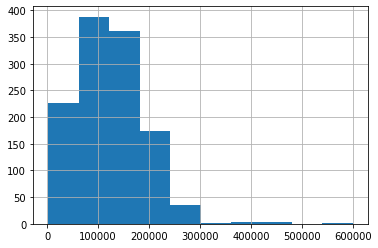

In [15]:
df['salary_in_usd'].hist();

Wow thats already pretty cool. Shows that people working with AI and Machine Learning mostly make arround 100k

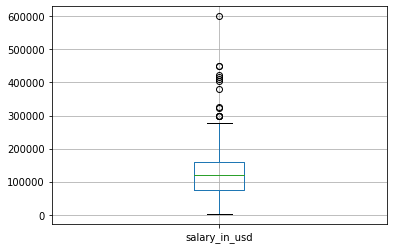

In [16]:
df.boxplot('salary_in_usd');

Good to see that there are no low outliers lol.

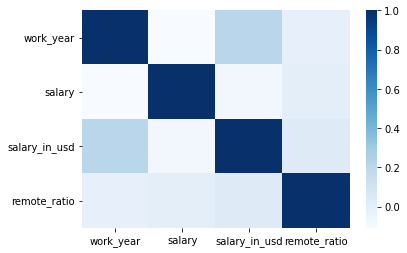

In [17]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

The only correlation of note is the salary in USD to work year. It has the highest correlation. Regular salary can be ignored as it is in several currencies.

In [18]:
paybyexp = df.groupby(['experience_level'])['salary_in_usd'].nunique()
paybyexp

experience_level
EN    106
EX     37
MI    207
SE    303
Name: salary_in_usd, dtype: int64

In [19]:
salaries = df.groupby('experience_level')['salary_in_usd'].mean()
salaries

experience_level
EN     58445.355072
EX    195607.414634
MI     90290.748408
SE    144448.015670
Name: salary_in_usd, dtype: float64

In [20]:
explevel = list(paybyexp.index)
explevel

['EN', 'EX', 'MI', 'SE']

Text(0.5, 1.0, 'Average Salaries by Experience Level')

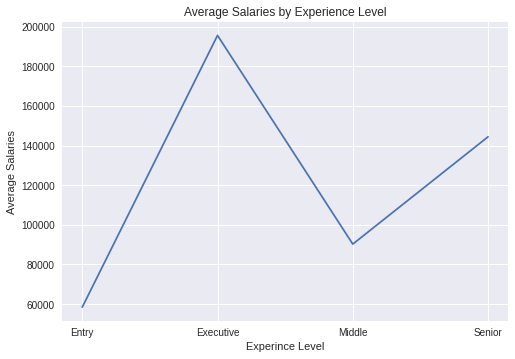

In [21]:

plt.style.use('seaborn')
plt.plot(explevel, salaries);
x = explevel
my_xticks = ['Entry','Executive','Middle','Senior']
plt.xticks(x, my_xticks)
plt.xlabel('Experince Level')
plt.ylabel('Average Salaries');
plt.title('Average Salaries by Experience Level')


This graph shows the average salaries by experience level. Excutive level positions pay the most.

In [22]:
paybycur = df.groupby(['salary_currency'])['salary_in_usd'].nunique()
paybycur

salary_currency
AUD      7
BRL      5
CAD     20
CHF      1
CLP      1
CNY      2
CZK      1
DKK      3
EUR     89
GBP     42
HUF      2
INR     35
JPY      3
MXN      2
PLN      3
SGD      3
TRY      3
USD    316
Name: salary_in_usd, dtype: int64

In [23]:
currencyeqv = df.groupby('salary_currency')['salary_in_usd'].mean()
currencyeqv

salary_currency
AUD     75508.750000
BRL      9673.800000
CAD    100145.714286
CHF    120334.000000
CLP     40038.000000
CNY     39696.500000
CZK      5149.000000
DKK     31192.666667
EUR     64394.829457
GBP     82937.302632
HUF     35997.000000
INR     26438.050000
JPY     60921.333333
MXN     18185.000000
PLN     36268.666667
SGD     91182.333333
TRY     20096.666667
USD    141640.933857
Name: salary_in_usd, dtype: float64

In [24]:
currency = list(paybycur.index)
currency

['AUD',
 'BRL',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HUF',
 'INR',
 'JPY',
 'MXN',
 'PLN',
 'SGD',
 'TRY',
 'USD']

Text(0.5, 1.0, 'Average Salaries by International Currency')

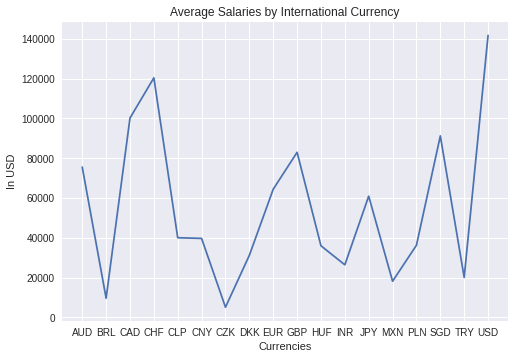

In [25]:

plt.style.use('seaborn')
plt.plot(currency, currencyeqv);
plt.xlabel('Currencies')
plt.ylabel('In USD');
plt.title('Average Salaries by International Currency')
